In [1]:
import pImpactR as impact
import numpy as np
import matplotlib.pyplot as plt
from math import ceil

In [2]:
kx = 1.0
betx = 1.0
emitx = 1.0e-6
sigx = (emitx*betx)**0.5

ke = 2.5e6
mass = 938.272045e6
g = ke/mass+1.0
bg = (g**2-1.0)**0.5
emitn = emitx*bg

nSample=12
Current = np.arange(nSample)*5.0e-3
print(sigx)
pData = [0]*nSample

0.001


In [3]:
const_focusing = impact.getElem('const_focusing')
loop = impact.getElem('loop')
const_focusing.length   = np.pi
const_focusing.n_sckick = ceil(const_focusing.length*30)
const_focusing.kx2 = kx**2
const_focusing.ky2 = kx**2
const_focusing.kz2 = 0.0
lattice = [loop, const_focusing]

In [4]:
beam = impact.getBeam()
beam.nCore_y = 4
beam.nCore_z = 4
beam.n_particles = 500000
beam.kinetic_energy = 100.0e6
beam.mass = mass
beam.frequency = 1.0
beam.distribution.distribution_type = 'Gauss'
beam.distribution.betx = betx
beam.distribution.bety = betx
beam.distribution.emitx = emitn
beam.distribution.emity = emitn*2
beam.distribution.emitz = 0.0

In [5]:
beam.mesh.fld_solver = 'Symplectic_Spectral_2D'
beam.mesh.mesh_x = 64
beam.mesh.mesh_y = 64
boundary_x: 0.016

In [6]:
# for i in range(nSample):
#     beam.current = Current[i]
#     print(i)
#     impact.writeInputFile(beam,lattice)
#     impact.run(beam)
#     pData[i]=impact.readParticleData(-111111,ke,mass,1)

In [7]:
import pickle

# with open('pData.pi.pickle', 'wb') as f:
#     pickle.dump(pData, f)
    
with open('pData.pi.pickle', 'rb') as f:
    pData=pickle.load(f)

In [8]:
import scipy.stats as stats
def getEmittance(X,P):
    Xt = X-np.mean(X)
    Pt = P-np.mean(P)
    xp = stats.moment(Xt*Pt,1)
    return np.sqrt(np.var(Xt)*np.var(Pt)-xp**2)

In [9]:
statData = {'n':np.arange(nSample),
            'emitx':np.zeros(nSample),
            'emity':np.zeros(nSample),
            'mux2' :np.zeros(nSample),
            'muy2' :np.zeros(nSample),
            'mux4' :np.zeros(nSample),
            'muy4' :np.zeros(nSample),
            'muxy2':np.zeros(nSample)}
for i in range(nSample):
    statData['emitx'][i] = getEmittance(pData[i][:,0],pData[i][:,1])
    statData['emity'][i] = getEmittance(pData[i][:,2],pData[i][:,3])
    statData['mux2'] [i] = stats.moment(pData[i][:,0],2)
    statData['muy2'] [i] = stats.moment(pData[i][:,2],2)
    statData['mux4'] [i] = stats.moment(pData[i][:,0],4)
    statData['muy4'] [i] = stats.moment(pData[i][:,2],4)
    statData['muxy2'][i] = stats.moment(pData[i][:,0]*pData[i][:,2],2)

In [10]:
with open('stat.1loop.pickle', 'wb') as f:
    pickle.dump(statData, f)

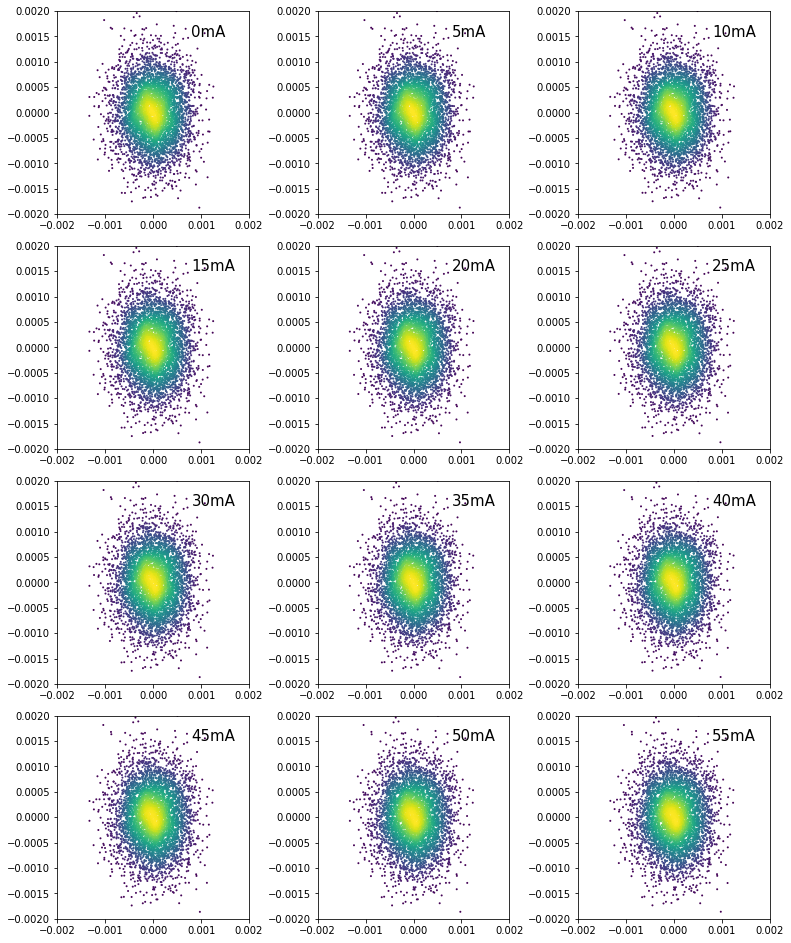

In [11]:
lim = (-2.0*sigx,2.0*sigx)
plt.figure(figsize=(11,ceil(nSample/3)*3.3))
for i in range(nSample):
    plt.subplot(ceil(nSample/3),3,i+1)
    impact.plot.poincare(pData[i][:,0],pData[i][:,2],samplePeriod=100,xlim=lim,ylim=lim)
    plt.text(0.0008,0.0015,str(int(Current[i]*1.0e3))+'mA',fontsize=15)
plt.tight_layout()
plt.savefig('vertical.1loop.png')

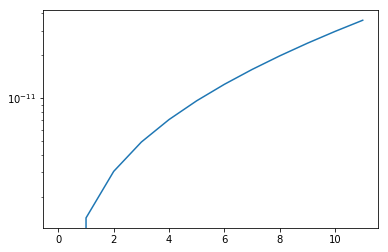

In [28]:
plt.semilogy(statData['mux2']-statData['mux2'][0])

In [34]:
def ratio(str):
    return (statData[str][2]-statData[str][0])/(statData[str][1]-statData[str][0])

In [38]:
for k in statData.keys():
    print(ratio(k))

2.0
0.8757927774145283
1.058358254324227
2.13095765333763
1.9525350323605413
2.054369700154786
2.2608900321416505
nan
2.2354458171025477


/home/kileanhwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
